In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
0
1
Quadro RTX 5000


# Problem 1

## Tracking the dimensionality of representations in CNNs

### k=4, s=1, p=1

$$
o = (50−4) + 2 (1) + 1 = 49
$$

### k=8, s=5, p=0

$$
o=\Big\lfloor \frac{50−8}{5}\Big\rfloor + 1 = 9
$$

### k=10, s=2, p=2

$$
o=\Big\lfloor \frac{50 + 2(2) − 10}{2} \Big\rfloor + 1 = 23
$$

### k=2, s=1, p=0

$$
o = (50 - 2) + 1 = 49
$$

## Train CNN

In [22]:
!python p1.py

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.337240
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.283359
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.214559
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.198756
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.108825
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.156682
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.236543
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.049021
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.134972
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.512900

Test set: Average loss: 0.1089, Accuracy: 9676/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.050316
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.078987
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.079503
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.108518
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.111997
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.154088
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.113799
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.047026
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.021525
T

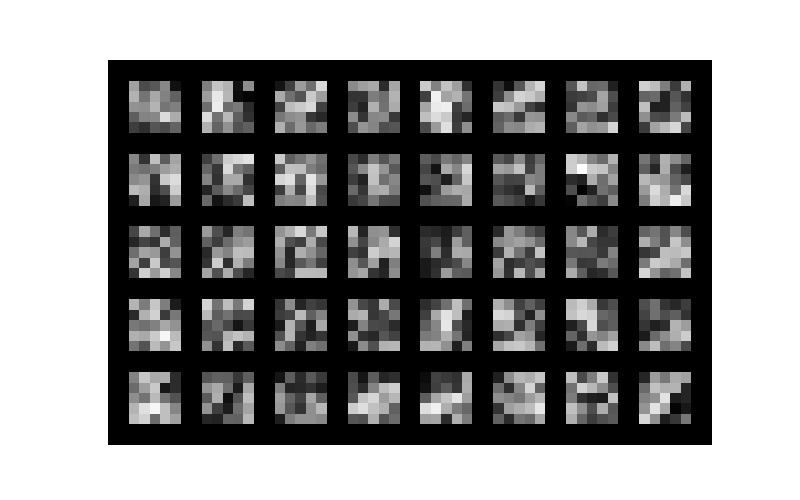

In [23]:
from IPython.display import Image
Image(filename='filters.png') 

## Confusion Matrix

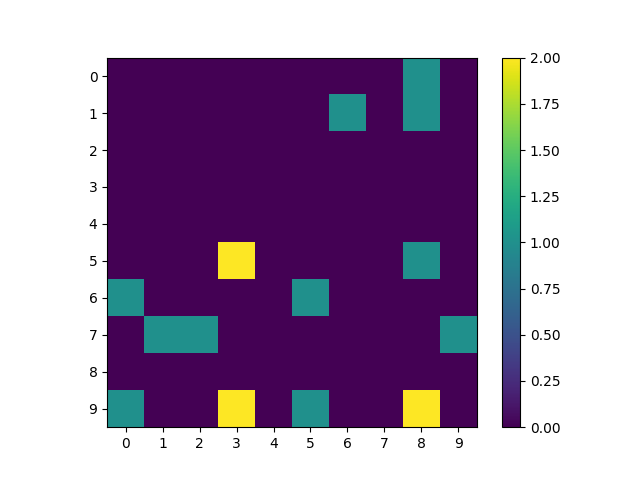

In [24]:
from IPython.display import Image
Image(filename='confusion_mat.png') 

In general, our results are excellent and we achieve nearly 100% accuracy. Therefore, there are very few values in the confusion matrix above. However, we can see that some of the more difficult to distingush values: 5 and 3, 3 and 9, 9 and 8 were the ones with the most errors. This makes sense as some of these hand written digits may be confusing to tell apart, even for humans. 

# Problem 2

## PCA

The PCA components are chosen by maximizing the variance in the data. The first PCA component is the axis along which the variance is most maximized, following by the second PC, and so on, with all PCs being orthogonal to one another. The `torch.svd()` function computed the singular value decomposition of a matrix. In the case of PCA, the matrix is the data matrix. The columns of $US$ in the decomposition $X = USV^T$ are the PCs. This is all assuming that the data matrix $X$ has been centered.

## PCA vs Autoencoder

Both are methods of dimensionality reduction that preserve different concepts of similarity. Moreoever, a single layer autoencoder with a fully connected hidden layer, a linear activation function, and a squared error cost function computes dimensions that have the same subspace as those found by PCA. However, while PCA is restricted to find an orthogonal subspace, this is not the case for an AE. Therefore, the AE will not exactly model the PC dimensions of PCA, though their respective subspaces will be the same. 



## Convolutional Autoencoder

The differences between a linear and convolutional autoencoder lie in the convolutions. A linear AE has linear activation functions and given a complete AE, will learn the identity function. When we regularize or bottleneck this AE, it attempts to learn the most useful features to find a dense representation of a dataset to reconstruct it. The goal of the ConvAE is the same, but it does so by learning optimal filters. Therefore, a convolutional AE takes into account 2D structures, while a linear AE does not. This is useful in images that are 2D, so the data does not have to be flattened into a linear format. 

In [21]:
!python p2.py

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.243704
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.126108
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.057834
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.016768
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.015116
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.939808
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.892687
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.831676
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.775558
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.786313

Test set: Average loss: 600.1499, Accuracy: 0/10000 (0%)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.754071
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.748762
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.716346
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.762694
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.727215
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.716378
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.

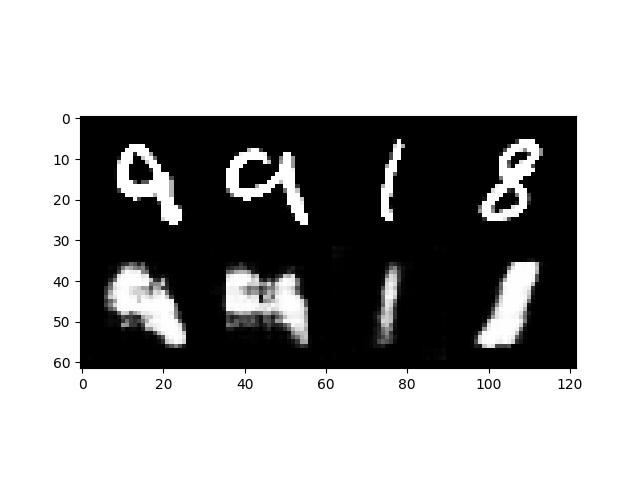

In [25]:
from IPython.display import Image
Image(filename='reconstructed_5.png') 

## Denoising Autoencoder and VAE

A denoising autoencoder adds noise of some kind to the input of a data entry (such as an image) and then tries to reconstruct the original image. Therefore, the AE learns a robust, dense representation that tries to remove any spurious noisy signal. A denoising AE is still mainly used as a method of dimensionality reduction while a VAE is a generative method, that can be used similarly to a GAN. A VAE approximates variational inference of the latent Gaussian model by using the KL divergence between the two probability distributions. Using the learned Gaussian parameters, we can generate new samples of our dataset that lie on a smooth manifold of the sample space. We cannot generate such samples from other types of AEs because the sample space is not smoothed like in a VAE. Therefore, we may get samples that are completely impossible. 

# Problem 3

For this test, we chose Sherlock Holmes and The Hound of the Baskervilles, by Arthur Conan Doyle from Project Gutenberg. 

**NOTE:** We also tried with the entire Bee Movie script, but we did not get useful representations and our loss was quite high. I believe it has to do with the fact that a movie script has lots of repeating names and other stylization that led to less effective embedding. With some additional preprocessing, the script may have fared well also. 

In [26]:
from __future__ import unicode_literals, print_function, division

# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import re

from io import open
import glob
import os
import unicodedata
import string

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [28]:
from rnn import *

In [29]:
BATCH_SIZE = 10
ITERATIONS = 2000
SEQ_LENGTH = 50
EMBEDDING_SIZE = 100
LSTM_SIZE = 64


# TODO 1: put a text file of your choosing in the same directory and put its name here
TEXT_FILE = 'sherlock_holmes.txt'

string = open(TEXT_FILE).read()

# convert text into tekens
tokens = re.split('\W+', string)

# get vocabulary
vocabulary = sorted(set(tokens))

# get corresponding indx for each word in vocab
word_to_ix = {word: i for i, word in enumerate(vocabulary)}

VOCABULARY_SIZE = len(vocabulary)
print('vocab size: {}'.format(VOCABULARY_SIZE))



vocab size: 5981


In [30]:
#############################################
# TODO 2: create variable for embedding matrix. Hint: you can use nn.Embedding for this
#############################################
embedding = nn.Embedding(VOCABULARY_SIZE, EMBEDDING_SIZE)


In [31]:
# !python rnn.py


#############################################
# TODO: create loss/train ops
#############################################

# ex.
encoder = LSTMEncoder(EMBEDDING_SIZE, LSTM_SIZE)
decoder = LSTMDecoder(EMBEDDING_SIZE, LSTM_SIZE, VOCABULARY_SIZE)
model = Seq2Seq(encoder, decoder, embedding)
loss_fn = nn.CrossEntropyLoss()
# loss = loss_fn(out,one_hots)
optimizer = optim.Adam(model.parameters(),lr=0.001)
    


In [32]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)
        
model.apply(init_weights)

Seq2Seq(
  (encoder): LSTMEncoder(
    (lstm): LSTM(100, 64)
  )
  (decoder): LSTMDecoder(
    (lstm): LSTM(100, 64)
    (out): Linear(in_features=64, out_features=5981, bias=True)
  )
  (embedding): Embedding(5981, 100)
)

In [33]:
# torch.set_printoptions(profile="full")
torch.set_printoptions(profile="default") # reset

In [34]:
# do training
model.train()

i = 0
for num_iter in range(ITERATIONS):

    if num_iter % 100 == 0: print(num_iter)
    batch = [[vocabulary.index(v) for v in tokens[ii:ii + SEQ_LENGTH]] for ii in range(i, i + BATCH_SIZE)]
    batch = np.stack(batch, axis=0)
    batch = torch.tensor(batch, dtype=torch.long)
    i += BATCH_SIZE
    if i + BATCH_SIZE + SEQ_LENGTH > len(tokens): i = 0

    #############################################
    #TODO: create loss and update step
    #############################################
    batch = batch.reshape(SEQ_LENGTH, BATCH_SIZE)
    outputs = model(batch) 
    
    output_dim = outputs.shape[-1]
    outputs = outputs.view(-1, output_dim)
    batch = batch.view(-1)
    loss = loss_fn(outputs,batch)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if num_iter % 100 == 0:
        print(loss.item())

0
8.71170425415039
100
7.072033405303955
200
6.907461166381836
300
6.88503360748291
400
6.709749698638916
500
6.683263301849365
600
6.3394880294799805
700
6.74718713760376
800
6.557697772979736
900
5.924126148223877
1000
7.283639907836914
1100
6.57071590423584
1200
6.169252872467041
1300
6.2506937980651855
1400
6.3319621086120605
1500
6.670322418212891
1600
6.567925453186035
1700
6.729686737060547
1800
6.806267261505127
1900
7.120848178863525


In [35]:
# vocabulary
learned_embeddings = embedding.weight.detach().numpy()

In [36]:
print(decoder)

LSTMDecoder(
  (lstm): LSTM(100, 64)
  (out): Linear(in_features=64, out_features=5981, bias=True)
)


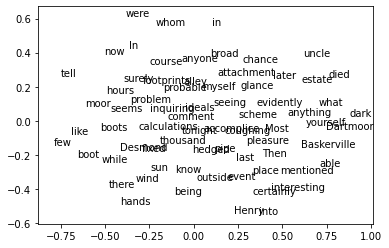

In [39]:
fig = plt.figure()
learned_embeddings_pca = sklearn.decomposition.PCA(2).fit_transform(learned_embeddings)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(learned_embeddings_pca[:, 0], learned_embeddings_pca[:, 1], s=5, c='w')
MIN_SEPARATION = .009 * min(ax.get_xlim()[1] - ax.get_xlim()[0], ax.get_ylim()[1] - ax.get_ylim()[0])

fig.clf()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(learned_embeddings_pca[:, 0], learned_embeddings_pca[:, 1], s=5, c='w')


#############################################
# TODO 5: run this multiple times
#############################################

xy_plotted = set()
for i in np.random.choice(VOCABULARY_SIZE, VOCABULARY_SIZE, replace=False):
    x_, y_ = learned_embeddings_pca[i]
    if any([(x_ - point[0])**2 + (y_ - point[1])**2 < MIN_SEPARATION for point in xy_plotted]): continue
    xy_plotted.add(tuple([learned_embeddings_pca[i, 0], learned_embeddings_pca[i, 1]]))
    ax.annotate(vocabulary[i], xy=learned_embeddings_pca[i])


We see that some of the proper nouns such as "Baskerville" and "Dartmoor" are near one another, while simple transition words such as "were" and "whom" are close by. Further, a simple check is that we see "In" and "in" are near one another. 

# Problem 4

The code takes too long to run in Jupyter notebooks, so we ran it independently and just reproduce the results here. 

---

## Node Classification

In [41]:
with open("./nodeclass-772991.out") as f:
    graph_class_putput = f.read()
print(graph_class_putput)

Starting at Sun May  9 13:04:00 EDT 2021
Job submitted to the gpu partition, the default partition on farnam
Job name: vsoc_nodeclass, Job ID: 772991
  I have 1 CPUs and 50GiB of RAM on compute node p01r03n32.farnam.hpc.yale.internal
Restoring modules from user's deeplearningmods, for system: "farnam-rhel7"

CommandNotFoundError: Your shell has not been properly configured to use 'conda deactivate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Contains isolated nodes: False
Co

In our updated (Xu) GCN, we see lower performance than the original Kipf Welling GCN. This may be due to the increased complexity of using an MLP as the update function, which requires additional tuning. We tried modulating the type of MLP, the number of nodes per layer, and epoch training time, and found that the results were not significantly different. The classic GCN may fare better since it is simpler and still able to aggregate node features effectively to learn node representations that lead to effective classification. 

## Graph Classification

In [40]:
with open("./graphclass-777365.out") as f:
    graph_class_putput = f.read()
print(graph_class_putput)

Starting at Sun May  9 13:43:44 EDT 2021
Job submitted to the gpu partition, the default partition on farnam
Job name: vsoc_graphclass, Job ID: 777365
  I have 1 CPUs and 50GiB of RAM on compute node c21n10.farnam.hpc.yale.internal
Restoring modules from user's deeplearningmods, for system: "farnam-rhel7"

CommandNotFoundError: Your shell has not been properly configured to use 'conda deactivate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Dataset: REDDIT-BINARY(2000):
Number of graphs: 2000
Number of features: 1
Number of classes: 2

Data(edge_index=[2, 480], x=[218, 1], y=[1])
Number of nodes: 218
Number of edges: 480
Average node degree: 2.20
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True
Number of 

As we can see from the above, the accuracies for our updated (Xu) GCN reach up to 0.70 on the test dataset for the Graph Classification task on the Reddit Binary dataset. Conversely, the Kipf and Welling GCN remains at 0.4940. This is because we don't have any node features and simply used a constant feature. However, the issue in the Kipf Welling model is that without node feature differences, the model cannot learn anything from aggregation. This is due to the fact that the ReLU function receives a weight matrix multiplied by a value of 1, which outputs 1 and therefore nothing is learned over each layer of the GCN. However, with the use of the MLP as the update method, we introduce non-linearity which allows expression of differences between time steps. This is partly due to the additional weight matrices that are used and their random initializations, which leads to updates in the MLP weight matrices. 